In [4]:
# Import the pandas library as pd
import pandas as pd
import matplotlib.pyplot as plt

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('../datasets/police.csv')
# create a date time column.
ri['stop_datetime'] =  pd.to_datetime(ri.stop_date + ' ' + ri.stop_time)
# set the date time as an index.
ri.set_index('stop_datetime', inplace=True)

# Examine the head of the DataFrame
print(ri.head())

                    state   stop_date stop_time  county_name driver_gender  \
stop_datetime                                                                
2005-01-04 12:55:00    RI  2005-01-04     12:55          NaN             M   
2005-01-23 23:15:00    RI  2005-01-23     23:15          NaN             M   
2005-02-17 04:15:00    RI  2005-02-17     04:15          NaN             M   
2005-02-20 17:15:00    RI  2005-02-20     17:15          NaN             M   
2005-02-24 01:20:00    RI  2005-02-24     01:20          NaN             F   

                    driver_race                   violation_raw  violation  \
stop_datetime                                                                
2005-01-04 12:55:00       White  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00       White                        Speeding   Speeding   
2005-02-17 04:15:00       White                        Speeding   Speeding   
2005-02-20 17:15:00       White                Call for Service

# Exploring the weather dataset

### Plotting the temperature

Let's examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First printing the summary statistics, and then visualizeing the data using a box plot.

When deciding whether the values seem reasonable, i'll keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


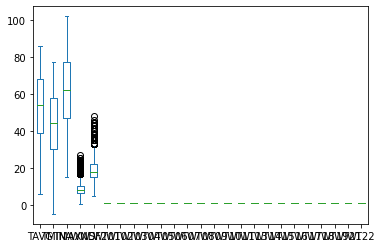

In [5]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv("../datasets/weather.csv")

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather.plot(kind='box')

# Display the plot
plt.show()

### Plotting the temperature difference

Let's continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


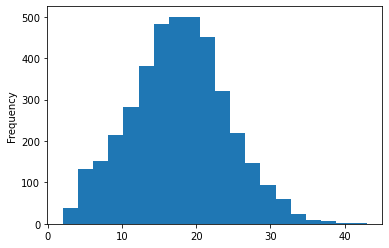

In [8]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

# Categorizing the weather

### Counting bad weather conditions

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

    WT05 indicates "Hail"
    WT11 indicates "High or damaging winds"
    WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

Let's quantify "how bad" the weather was each day by counting the number of 1 values in each row.